# GALACTIC - Data Virtualization - PW4

## Prerequisite - Exercise 1

In [1]:
!pip install --find-links https://galactic.univ-lr.fr/packages py-galactic[docs]

Looking in links: https://galactic.univ-lr.fr/packages
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 70.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of sphinx to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of sphinx to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the depen

## Exercise 2

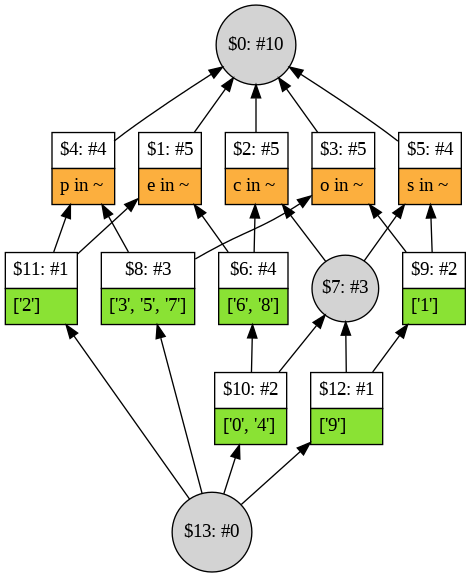

In [ ]:
from galactic_description_logical_classic import BooleanDescription
from galactic_characteristic_logical import Bool
from galactic.algebras.lattice import *
from galactic.algebras.poset import HasseDiagram
from galactic.population import Population
from galactic.descriptions import Member
from galactic.concepts import ConceptLattice, Concept, ConceptRenderer
from galactic.strategies import *
from galactic.characteristics import *
from galactic.examples import *
from galactic.concepts import ConceptLattice
from galactic_strategy_logical_classic_basic import BooleanStrategy
# the data
data = {
0: ["c", "e", "s"],
1: ["o", "s"],
2: ["e", "p"],
3: ["o", "p"],
4: ["c", "e", "s"],
5: ["o", "p"],
6: ["c", "e"],
7: ["o", "p"],
8: ["c", "e"],
9: ["c", "o", "s"],
}
## creating a population from the data
population = Population(data)
## creating descriptions
descriptions = [
BooleanDescription(Bool(Member(name="c"))),
BooleanDescription(Bool(Member(name="e"))),
BooleanDescription(Bool(Member(name="o"))),
BooleanDescription(Bool(Member(name="p"))),
BooleanDescription(Bool(Member(name="s"))),
]
## creating a concept lattice based on the population and the descriptions
lattice = ConceptLattice(population, descriptions)
## using the stragtegies to generate the lattice
lattice.apply([
BooleanStrategy(Bool(Member(name="c"))),
BooleanStrategy(Bool(Member(name="e"))),
BooleanStrategy(Bool(Member(name="o"))),
BooleanStrategy(Bool(Member(name="p"))),
BooleanStrategy(Bool(Member(name="s"))),
])
## showing the hasse diagram
HasseDiagram(lattice, domain_renderer=ConceptRenderer())


## Excercise 3

In [ ]:
list(str(concept) for concept in lattice.domain)

['',
 'e in ~',
 'c in ~',
 'o in ~',
 'p in ~',
 's in ~',
 'c in ~ and e in ~',
 'c in ~ and s in ~',
 'o in ~ and p in ~',
 'o in ~ and s in ~',
 'c in ~ and e in ~ and s in ~',
 'e in ~ and p in ~',
 'c in ~ and o in ~ and s in ~',
 'c in ~ and e in ~ and o in ~ and p in ~ and s in ~']

## Exercise 4

In [ ]:
from galactic.algebras.relational import BinaryTable
BinaryTable(
 lattice.reduced_context,
 domain_renderer=ConceptRenderer(join_irreducible=True),
 co_domain_renderer=ConceptRenderer(meet_irreducible=True)
)

| |@0|@1|@2|@3|@4|
|-:|-:|-:|-:|-:|-:|
|9|  |  | $\checkmark$| $\checkmark$| $\checkmark$|
|['3', '5', '7']| $\checkmark$|  |  | $\checkmark$|  |
|2| $\checkmark$| $\checkmark$|  |  |  |
|['0', '4']|  | $\checkmark$| $\checkmark$|  | $\checkmark$|
|['0', '4', '6', '8']|  | $\checkmark$| $\checkmark$|  |  |
|['1', '9']|  |  |  | $\checkmark$| $\checkmark$|

## Exercise 5

## Exercise 6

# See https://archive.ics.uci.edu/ml/datasets/Lenses

characteristics:
  - &id001 !characteristic.logical.Bool
    - !predicate.core.Equal
      characteristic: !characteristic.core.Key
        name: "age"
      data: "young"
  - &id002 !characteristic.logical.Bool
    - !predicate.core.Equal
      characteristic: !characteristic.core.Key
        name: "age"
      data: "pre-presbyopic"
  - &id003 !characteristic.logical.Bool
    - !predicate.core.Equal
      characteristic: !characteristic.core.Key
        name: "age"
      data: "presbyopic"
  - &id004 !characteristic.logical.Bool
    - !predicate.core.Equal
      characteristic: !characteristic.core.Key
        name: "spectacle prescription"
      data: "myope"
  - &id005 !characteristic.logical.Bool
    - !predicate.core.Equal
      characteristic: !characteristic.core.Key
        name: "spectacle prescription"
      data: "hypermetrope"
  - &id006 !characteristic.logical.Bool
    - !predicate.core.Equal
      characteristic: !char

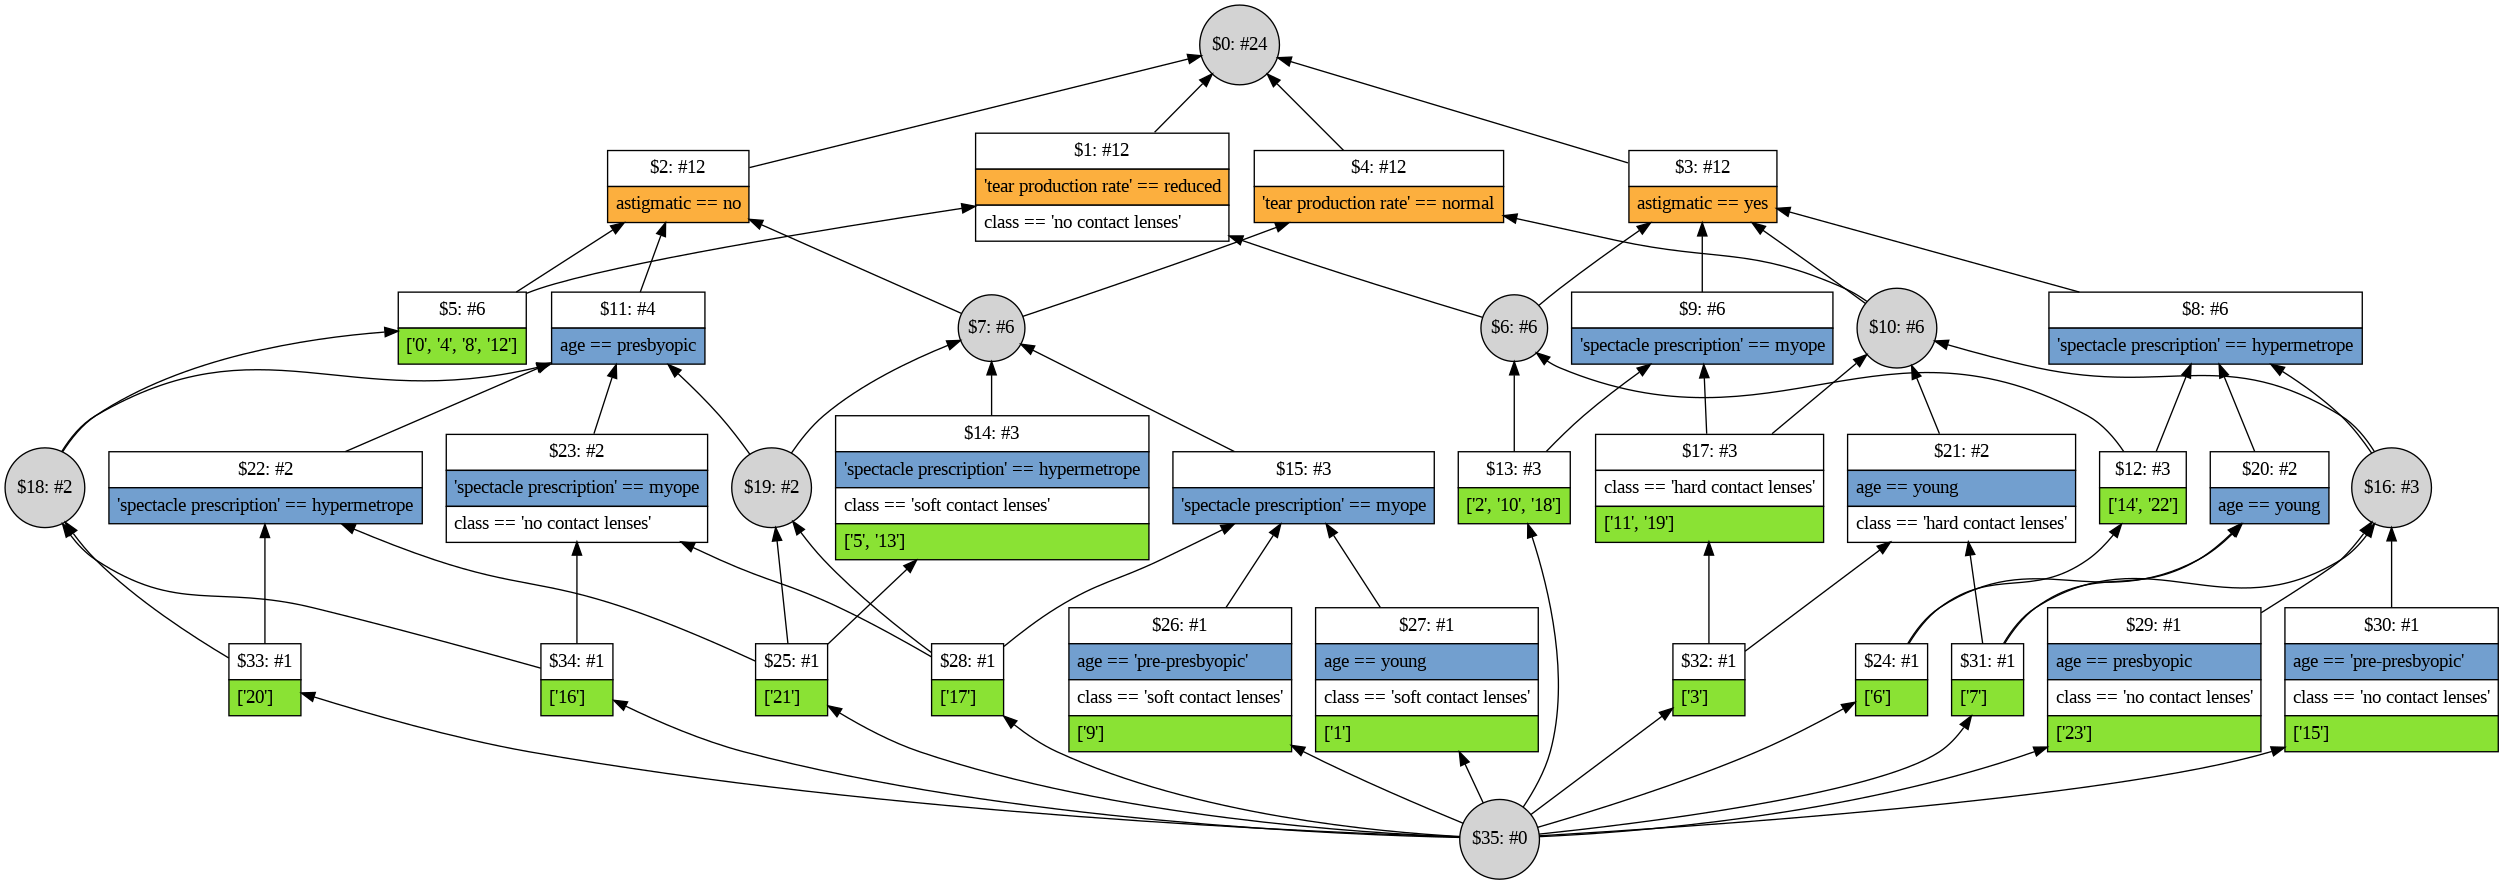

In [ ]:
with open("/content/lenses.csv", "r") as data_file:
    population = Population.from_file(data_file)

len(population)

from galactic.strategies import Explorer

with open("/content/entropy.explorer.yaml", "r") as explorer_file:
    print(explorer_file.read())
    explorer_file.seek(0)
    explorer = Explorer.from_file(explorer_file)

lattice = ConceptLattice.create(
    population=population,
    descriptions=explorer.descriptions,
    strategies=explorer.strategies,
)

HasseDiagram(
    lattice,
    domain_renderer=ConceptRenderer(
        show_predicates=True,
        compact=False,
    ),
)


## Exercise 7

In [ ]:
list(str(concept) for concept in lattice.domain)

['',
 "'tear production rate' == reduced and class == 'no contact lenses'",
 'astigmatic == no',
 'astigmatic == yes',
 "'tear production rate' == normal",
 "astigmatic == no and 'tear production rate' == reduced and class == 'no contact lenses'",
 "astigmatic == yes and 'tear production rate' == reduced and class == 'no contact lenses'",
 "astigmatic == no and 'tear production rate' == normal",
 "'spectacle prescription' == hypermetrope and astigmatic == yes",
 "'spectacle prescription' == myope and astigmatic == yes",
 "astigmatic == yes and 'tear production rate' == normal",
 'age == presbyopic and astigmatic == no',
 "'spectacle prescription' == hypermetrope and astigmatic == yes and 'tear production rate' == reduced and class == 'no contact lenses'",
 "'spectacle prescription' == myope and astigmatic == yes and 'tear production rate' == reduced and class == 'no contact lenses'",
 "'spectacle prescription' == hypermetrope and astigmatic == no and 'tear production rate' == normal an

## Exercise 11

### Node $3: #50 (Iris-setosa)
- **Description**:
  - Petal length ≤ 1.9
  - Petal width ≤ 0.6
  - Class: {'Iris-setosa'}
  - Sepal length ≤ 5.8
  - Sepal width ≥ 2.3
- **Objects**: ['0', '1', '2', '3', '4', '5', ...]

---

### Node $12: #2 (Iris-virginica)
- **Description**:
  - Sepal length ≤ 6
  - Sepal width ≤ 3
  - Class: {'Iris-virginica'}
- **Objects**: ['126', '138']

---

### Node $13: #2 (Iris-versicolor)
- **Description**:
  - Sepal length ≤ 6.7
  - Petal length ≤ 5.1
  - Class: {'Iris-versicolor'}
- **Objects**: ['77', '83']

---

### Node $15: #1 (Iris-versicolor)
- **Description**:
  - Sepal length ≤ 5.9
  - Sepal width ≥ 3.2
  - Class: {'Iris-versicolor'}
- **Objects**: ['70']

---

### Node $7: #43 (Iris-virginica)
- **Description**:
  - Petal length ≥ 4.9
  - Class: {'Iris-virginica'}
- **Objects**: ['100', '101', '102', '103', '104', '105', ...]
